# 1) Load Dependencies

In [1]:
import pandas as pd
from src.paper import pull_results, plot_metrics, create_descriptives, latex_exporter
from src.utils import csv_exporter
from src.utils.paths import *

Loading helper functions...
Loading paths...


# 2) Pull Results from Pipeline

In [2]:
# Use a specific timestamp, otherwise it just uses "latest"
# timestamp = "YYYYMMDD-hhmm"

# File names to analyze:
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] # + ['eurusd']

# Move pipeline results to "analyzed_data" folder
pull_results(timestamp="latest", file_prefix=file_names)

Finished pulling files!


# 3) Create Descriptive Table

In [3]:
# Select varibales to print in table
filter_variables = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"] + ['x1', 'x2', 'x3'] # + ['bid_close']

In [4]:
descriptives = create_descriptives(file_names, filter_variables)

In [5]:
# Show table
display(descriptives)

,start,end,count,mean,std,min,25%,50%,75%,max
Data,,,,,,,,,,
RW,2004-01,2023-12,240.0,68.215495,10.103961,40.0,61.588426,68.492171,74.799536,90.0
TrendSeasRW,2004-01,2023-12,240.0,65.212735,9.860455,40.0,59.442427,65.278618,70.045723,90.0
WeakSARIMA,2004-01,2023-12,240.0,65.434632,9.932379,40.0,59.695437,65.626215,70.117469,90.0
StrongSARIMA,2004-01,2023-12,240.0,65.665527,10.656031,40.0,58.531350,66.647129,70.413462,90.0
SARIMAX,2004-01,2023-12,240.0,66.785970,12.470082,40.0,56.642862,68.105724,75.746263,90.0
x1,2004-01,2023-12,240.0,360.268079,73.697749,200.0,308.950805,381.153821,418.607367,500.0
x2,2004-01,2023-12,240.0,57.956553,8.979728,40.0,50.990507,56.779285,64.344842,80.0
x3,2004-01,2023-12,240.0,923.168300,12.484585,900.0,914.459089,921.004521,933.860990,950.0


In [6]:
# Export as csv
csv_exporter(TABLE_DIR, descriptives)


Exporting descriptives as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!


In [7]:
# Print and Export to LaTex
caption = "Descriptive Statistics"
# latex_exporter(descriptives, caption=caption)
with open(os.path.join(TABLE_DIR, "descriptives.tex"), "w") as f:
    f.write(latex_exporter(descriptives.round(2).astype(str), caption=caption))

In [8]:
# Note: \usepackage{booktaps} in LaTex

# 4) Create Metrics Ranking Table

In [9]:
ranking_data = [os.path.join(PAPERDATA_DIR, file) for file in os.listdir(PAPERDATA_DIR) if file.endswith
("metrics_ranking.csv")]

In [10]:
# Print and export to LaTex and csv
ranking_list = []
for i, file in enumerate(file_names):
    ranking = pd.read_csv(os.path.join(PAPERDATA_DIR, f"{file}_metrics_ranking.csv"), index_col="Model")
    ranking_list.append(ranking)
    caption = f"Ranking Forecasters and Ensemblers by Predictive Performance - Data Complexity: {i + 1}"
    
    # print(f"Table for Complexity {i+1}\n")
    # print(latex_exporter(df, caption=caption))
    # print("\n")
    # Export to LaTex
    with open(os.path.join(TABLE_DIR, f"{file}_metrics_ranking.tex"), "w") as f:
        f.write(latex_exporter(ranking.round(3).astype(str), caption=caption))
    # Export to csv
    csv_exporter(TABLE_DIR, ranking, file_names=f"{file}_metrics_ranking")
    
    print(f"\nRanking for {file}:")
    display(ranking)


Exporting RW_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for RW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Variance,0.056137,4.984609,3.719821,1,2,1
Weighted Ensemble: Inverse RMSE,0.056352,5.002579,3.733871,2,3,2
Weighted Ensemble: Simple,0.056642,5.033457,3.753291,3,5,3
AutoTheta,0.056935,4.951562,3.767992,4,1,4
AutoSARIMA,0.057145,5.017356,3.782219,5,4,5
Naive,0.059176,5.149567,3.925315,6,6,6
Weighted Ensemble: Inverse Error Covariance,0.059647,5.211749,3.952922,7,7,7
Exponential Smoothing,0.060308,5.274425,4.000638,8,8,8
TiDE,0.061034,5.395124,4.047699,9,9,9



Exporting TrendSeasRW_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for TrendSeasRW:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Variance,0.034969,3.142844,2.330395,1,1,1
Weighted Ensemble: Inverse RMSE,0.035057,3.150374,2.336016,2,2,2
Weighted Ensemble: Simple,0.035058,3.151048,2.336445,3,3,3
Weighted Ensemble: Inverse Error Covariance,0.037188,3.318728,2.476791,4,5,4
Exponential Smoothing,0.037530,3.340527,2.498175,5,6,6
AutoSARIMA,0.037537,3.244438,2.497060,6,4,5
AutoTheta,0.038564,3.405900,2.566496,7,7,7
TiDE,0.038783,3.555382,2.585410,8,10,8
Meta Ensemble: SVR,0.038787,3.435591,2.588056,9,8,9



Exporting WeakSARIMA_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for WeakSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse Variance,0.028514,2.577474,1.901336,1,1,1
Weighted Ensemble: Simple,0.028550,2.590860,1.903842,2,3,2
Weighted Ensemble: Inverse RMSE,0.028590,2.585070,1.906166,3,2,3
AutoSARIMA,0.030213,2.638002,2.011089,4,4,4
Exponential Smoothing,0.030866,2.743687,2.056202,5,5,5
Weighted Ensemble: Inverse Error Covariance,0.030954,2.763787,2.062406,6,6,6
AutoTheta,0.032079,2.822191,2.136678,7,8,7
Meta Ensemble: SVR,0.032303,2.927370,2.156422,8,10,8
Meta Ensemble: Random Forest,0.032714,2.917809,2.186314,9,9,9



Exporting StrongSARIMA_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for StrongSARIMA:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse RMSE,0.021499,1.968394,1.434097,1,2,1
Weighted Ensemble: Inverse Variance,0.021629,1.985681,1.443055,2,3,2
Weighted Ensemble: Simple,0.021811,2.009829,1.455137,3,4,4
AutoSARIMA,0.021833,1.947366,1.454290,4,1,3
Exponential Smoothing,0.022482,2.013837,1.498544,5,5,5
Naive,0.022841,2.014759,1.522180,6,6,6
AutoTheta,0.023318,2.080418,1.554293,7,7,7
Meta Ensemble: Random Forest,0.023490,2.173702,1.566722,8,9,8
Weighted Ensemble: Inverse Error Covariance,0.023773,2.240533,1.578863,9,10,9



Exporting SARIMAX_metrics_ranking as csv to C:\Users\Work\OneDrive\GAU\3. Semester\Statistisches Praktikum\Git\NEW_Ensemble_Techniques_TS_FC\paper\tables...
...finished!

Ranking for SARIMAX:


,MAPE,RMSE,sMAPE,MAPE Ranking,RMSE Ranking,sMAPE Ranking
Model,,,,,,
Weighted Ensemble: Inverse RMSE,0.027950,2.652159,1.863528,1,2,2
AutoSARIMAX with covariates,0.027973,2.613503,1.863506,2,1,1
Weighted Ensemble: Inverse Variance,0.028044,2.663745,1.870505,3,4,4
Weighted Ensemble: Simple,0.028066,2.669684,1.871952,4,5,5
AutoSARIMA,0.028086,2.655436,1.870248,5,3,3
Naive,0.028448,2.736189,1.893638,6,7,6
Exponential Smoothing,0.028871,2.719176,1.919730,7,6,7
AutoTheta,0.029765,2.788908,1.981329,8,8,8
Weighted Ensemble: Inverse Error Covariance,0.029933,2.849370,1.993154,9,9,9


In [11]:
# Note: \usepackage{booktaps} in LaTex

# 5) Create Metrics Ranking Plot

Dataset: RW_metrics_ranking.csv 
Best Model: AutoTheta 
RMSE Value: 4.952 

Dataset: TrendSeasRW_metrics_ranking.csv 
Best Model: AutoSARIMA 
RMSE Value: 3.244 

Dataset: WeakSARIMA_metrics_ranking.csv 
Best Model: AutoSARIMA 
RMSE Value: 2.638 

Dataset: StrongSARIMA_metrics_ranking.csv 
Best Model: AutoSARIMA 
RMSE Value: 1.947 

Dataset: SARIMAX_metrics_ranking.csv 
Best Model: AutoSARIMAX with covariates 
RMSE Value: 2.614 
Export successful!


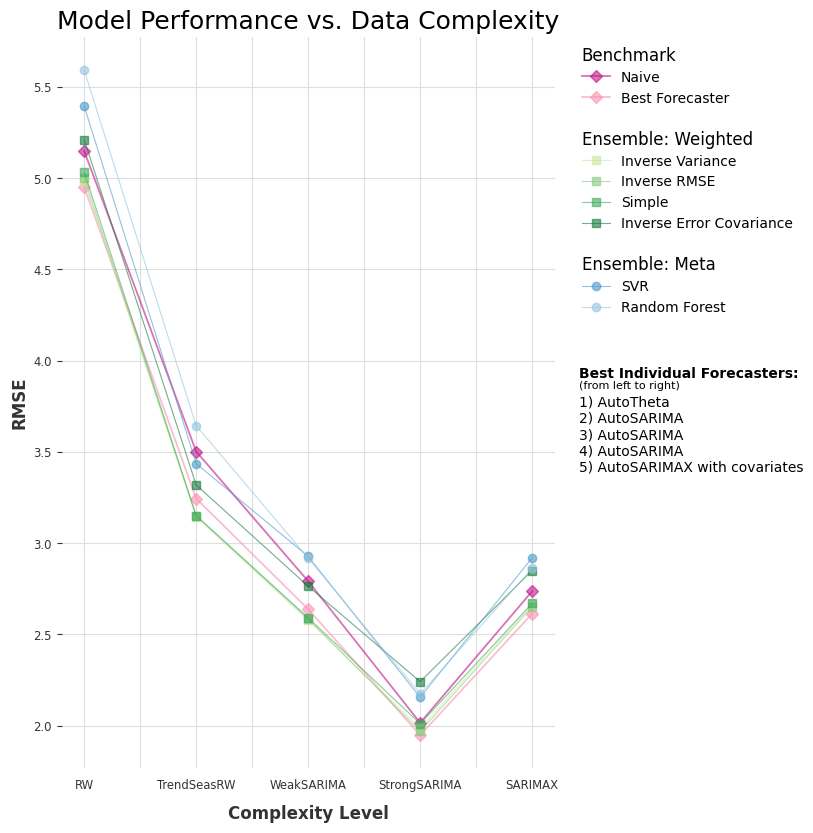

Dataset: RW_metrics_ranking.csv 
Best Model: AutoTheta 
MAPE Value: 0.057 

Dataset: TrendSeasRW_metrics_ranking.csv 
Best Model: Exponential Smoothing 
MAPE Value: 0.038 

Dataset: WeakSARIMA_metrics_ranking.csv 
Best Model: AutoSARIMA 
MAPE Value: 0.03 

Dataset: StrongSARIMA_metrics_ranking.csv 
Best Model: AutoSARIMA 
MAPE Value: 0.022 

Dataset: SARIMAX_metrics_ranking.csv 
Best Model: AutoSARIMAX with covariates 
MAPE Value: 0.028 
Export successful!


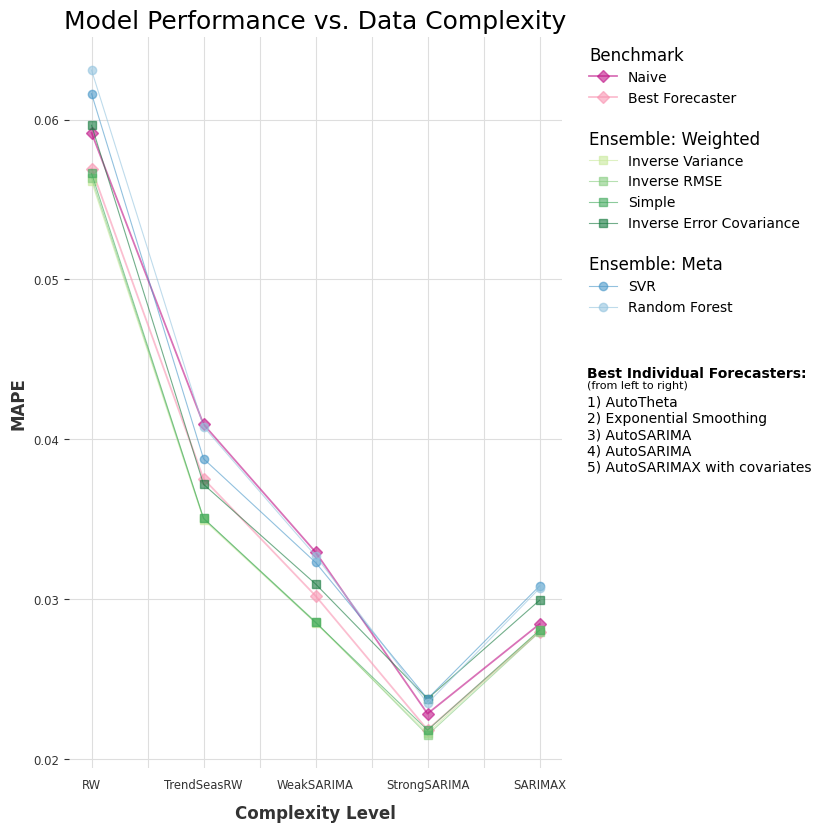

In [12]:
file_names = ["RW", "TrendSeasRW", "WeakSARIMA", "StrongSARIMA", "SARIMAX"]
plot_metrics(
    metric="RMSE", 
    sort_labels=file_names,
    export=True)

plot_metrics(
    metric="MAPE", 
    sort_labels=file_names,
    export=True)